In [2]:
#transform the messy data set into something that can be easily used
import pandas as pd
import statistics as st
data = pd.read_csv("EdStatsData.csv")
data = data[['Country Code','Indicator Code','2015']]
data = data[(data['Indicator Code'] == 'LO.PISA.MAT') | (data['Indicator Code'] == 'LO.PISA.REA') | (data['Indicator Code'] == 'LO.PISA.SCI')|(data['Indicator Code'] == 'IT.NET.USER.P2')]
data = data[data['2015'].notnull()]
data = data.pivot_table(index=['Country Code'], columns = ['Indicator Code'])
data.columns = [x[1] for x in data.columns]
data.rename(columns={"LO.PISA.MAT":"Math", "LO.PISA.REA":"Reading", "LO.PISA.SCI":"Science", "IT.NET.USER.P2":"internet_users_per_100"}, inplace=True)
data = data[(data['Math'].notnull()) & (data['Reading'].notnull()) & (data['Science'].notnull()) & (data['internet_users_per_100'].notnull())]
print(data)

              internet_users_per_100      Math   Reading   Science
Country Code                                                      
ALB                        63.252933  413.1570  405.2588  427.2250
ARE                        90.500000  427.4827  433.5423  436.7311
ARG                        68.043064  409.0333  425.3031  432.2262
AUS                        84.560519  493.8962  502.9006  509.9939
AUT                        83.940142  496.7423  484.8656  495.0375
...                              ...       ...       ...       ...
TUN                        48.519836  366.8180  361.0555  386.4034
TUR                        53.744979  420.4540  428.3351  425.4895
URY                        64.600000  417.9919  436.5721  435.3630
USA                        74.554202  469.6285  496.9351  496.2424
VNM                        43.500000  494.5183  486.7738  524.6445

[70 rows x 4 columns]


In [3]:
# Describe the typical score of a student in reading, writing, and mathematics
# We will use the T-Confidence Interval Function we wrote earlier in the Chapter
def t_confidence_interval(data, con_lvl):
    import statistics as st
    import scipy.stats as sp
    import math
    sample_mean = st.mean(data)
    sample_st_dev = st.stdev(data)
    n = len(data)
    crit_value = sp.t.ppf(((1 - con_lvl) / 2) + con_lvl, n-1)
    lower_limit = sample_mean - (crit_value * (sample_st_dev/math.sqrt(n)))
    higher_limit = sample_mean + (crit_value * (sample_st_dev/math.sqrt(n)))
    print(f'Your {con_lvl} t confidence interval is ({lower_limit},{higher_limit})')
    return (lower_limit,higher_limit)

print("For Math:")
t_confidence_interval(list(data['Math']),0.95)
print("For Reading:")
t_confidence_interval(list(data['Reading']),0.95)
print("For Science:")
t_confidence_interval(list(data['Science']),0.95)

For Math:
Your 0.95 t confidence interval is (448.2561338314995,473.6869804542148)
For Reading:
Your 0.95 t confidence interval is (449.1937943789569,472.80078847818595)
For Science:
Your 0.95 t confidence interval is (453.8991748650865,476.9790108491992)


(453.8991748650865, 476.9790108491992)

In [4]:
# Using A Hypothesis Test, evaluate whether having widespread internet infrastructure could have an impact on scores
# We need to divide the data set into majority internet (more than 50 users out of 100) and minority internet(50 users or less) 
data1 = data[data['internet_users_per_100'] > 50]
data0 = data[data['internet_users_per_100'] <= 50]

print(data1)
print(data0)

              internet_users_per_100      Math   Reading   Science
Country Code                                                      
ALB                        63.252933  413.1570  405.2588  427.2250
ARE                        90.500000  427.4827  433.5423  436.7311
ARG                        68.043064  409.0333  425.3031  432.2262
AUS                        84.560519  493.8962  502.9006  509.9939
AUT                        83.940142  496.7423  484.8656  495.0375
...                              ...       ...       ...       ...
SWE                        90.610200  493.9181  500.1556  493.4224
TTO                        69.198471  417.2434  427.2733  424.5905
TUR                        53.744979  420.4540  428.3351  425.4895
URY                        64.600000  417.9919  436.5721  435.3630
USA                        74.554202  469.6285  496.9351  496.2424

[63 rows x 4 columns]
              internet_users_per_100      Math   Reading   Science
Country Code                           

In [7]:
# We will use the 2 Sample T Test function from the Scipy package
import scipy.stats as sp

# We want to see if scores are higher for Data1, so we will put that first and divide the p-value by two
math_test_results = sp.ttest_ind(data1['Math'],data0['Math'],equal_var=False)
print(r'For Math: (note - statistic must be positive in order for there to be significance.)')
print(math_test_results.statistic)
print(math_test_results.pvalue / 2)

# We want to see if scores are higher for Data1, so we will put that first and divide the p-value by two
reading_test_results = sp.ttest_ind(data1['Reading'],data0['Reading'],equal_var=False)
print(r'For Reading: (note - statistic must be positive in order for there to be significance.)')
print(reading_test_results.statistic)
print(reading_test_results.pvalue / 2)


# We want to see if scores are higher for Data1, so we will put that first and divide the p-value by two
science_test_results = sp.ttest_ind(data1['Science'],data0['Science'],equal_var=False)
print(r'For Science: (note - statistic must be positive in order for there to be significance.)')
print(science_test_results.statistic)
print(science_test_results.pvalue / 2)


For Math: (note - statistic must be positive in order for there to be significance.)
3.6040958108257897
0.0036618262642996438
For Reading: (note - statistic must be positive in order for there to be significance.)
3.8196670837378237
0.0028727977455195778
For Science: (note - statistic must be positive in order for there to be significance.)
2.734488895919944
0.01425936325938158


In [114]:
#import sklearm linear model package
import sklearn.linear_model as lm

# Construct a Linear Model that can predict math scores from reading and science scores
y = data['Math']
x = data[['Science','Reading']]

model = lm.LinearRegression()
model.fit(x,y)

print(model.coef_)
print(model.intercept_)


[1.02301989 0.0516567 ]
-38.99549267679242


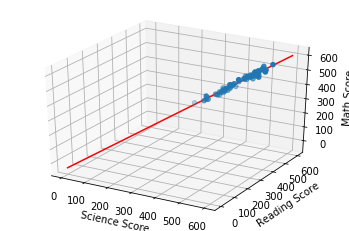

In [117]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

threedee = plt.figure().gca(projection='3d')
threedee.scatter(data['Science'], data['Reading'],data['Math'])
threedee.set_xlabel('Science Score')
threedee.set_ylabel('Reading Score')
threedee.set_zlabel('Math Score')

xline = np.linspace(0, 600, 600)
yline = np.linspace(0, 600, 600)
zline = xline*1.02301989 + yline*0.0516567-38.99549267679242
threedee.plot3D(xline, yline, zline, 'red')

plt.show()
